# Example code
This notebook runs the recommendation took for sample pair repository

Import os and set the directory to the parent directory ```MSCEDD/```

In [1]:
import os  
os.chdir('./..')

Import necessary libraries

In [2]:
import pickle
from Examples.PaReco import PaReco
import Methods.common as common

try:
    import argparse
    import magic
except ImportError as err:
    print (err)
    sys.exit(-1)

Add GitHub tokens

GitHub tokens can be added in two ways (choose one):
    
    1. Read from file from tokens.txt
    
    2. Manually add to the token_list in the notebook. 
    token_list = ['token1', 'token2', 'token3', ..., 'tokenx']

Keep in mind that GitHub tokens are automatically reverted when commited to GitHub. Before commiting always make sure to remove all tokens from the notebook ifyou add it in the notebook.

In [3]:
"""
    Read from list
"""
token_file = 'tokens.txt'

token_list = list()
with open(token_file) as f:
    lines = f.readlines()
    for line in lines[0].split(','):
        token_list.append(line)

"""
    Manually add in notebook
"""
# token_list = ['','']

lenTokens = len(token_list)

Create a magic cookie. This is needed during classification

In [4]:
common.verbose = False

try:
    common.magic_cookie = magic.open(magic.MAGIC_MIME)
    common.magic_cookie.load()
except AttributeError:
    common.magic_cookie = magic.Magic(mime=True, uncompress=True)
common.verbose_print('[-] initialized magic cookie\n')

Create the direcotires Repos_files and Repos_results that will be used to store data while running.

Run this only once to create the directories and after comment it out.

In [5]:
os.mkdir(os.path.join(os.getcwd(), 'Examples/Repos_files'))
os.mkdir(os.path.join(os.getcwd(), 'Examples/Repos_results'))

### Running the tool

Running tool is split into 6 steps

The data the tool needs is stored in data

        data = [(id, variant1, variant2, least_date, diverged_date, token_list)]
    
        id - a unique id for the pair of repository to identify it by, e.g '1'
        variant1 - the source repository
        variant2 - the target repository
        least_date - the cut off date for the repositories.
        diverged_date - diverged date of the target repository. 
        token_list - list of GitHub tokens
    
Pull requests are retrieved between [diverged_date, least_date]. You can shorten or lengthen the time by changing this interval. The least_date needs to be equal or later than the diverged_date.

If you wish to see all output of the tool, turn verbose mode on. This can be done by calling the ```verboseMode()``` function of the tool.

To turn it on: ```example.verboseMode()```
    
To turn it off: ```example.verboseMode(False)```

In [6]:
# data = ('1','learningequality/pycaption', 'pbs/pycaption', '', '', token_list)
# data = ('2','apache/kafka', 'linkedin/kafka', '', '', token_list)
data = ('3','hzdg/django-enumfields', 'druids/django-choice-enumfields', '', '', token_list)

Create an object of the PaReco class. 
This class contains all the necessary functions to run the tool.

In [7]:
example = PaReco(data)

Get the ```divergence date``` and ```cut_off_date``` for ```variant2```.

In [8]:
example.getDates()

The divergence_date of the repository druids/django-choice-enumfields is 2019-03-01T10:01:18Z and the cut_off_date is 2021-12-27T16:08:41Z.
The variant2 is ==>
	 Ahead by 21 patches
	 Behind by 40 patches
Select an interval within the period [2019-03-01T10:01:18Z, 2021-12-27T16:08:41Z] to limit the patches being checked.


Extract the patches from ```variant1``` (prs_source) and ```variant2``` (prs_variant) from GitHub in the time interval ```[diverged_date, cut_off_date]```. 

The date format is ```yyyy-mm-ddThh:mm:ssZ```. 

Pass the dates on as```extractPatches(diverged_date, cut_off_date)```. This will classify the patches within that time interval.

In [9]:
prs_source = example.extractPatches('2019-03-01T10:01:18Z', '2021-12-27T16:08:41Z')

Extracting patches between 2019-03-01T10:01:18Z and 2021-12-27T16:08:41Z...
pr_patch_ml: [109, 103, 102]
pr_title_ml: ['fix enumsupportserializermixin for non-editable fields', 'readme fix rollup', 'fix ci']


The patch number and the patch titles extracted in the previous step are stored in adataframe.

Access this data using dfPatches().

You can control the number of rows you wish to see by passing a integer, n,  to the function that will only output the first n rows.

In [10]:
example.dfPatches()

,Patch number,Patch title
0,109,fix enumsupportserializermixin for non-editabl...
1,103,readme fix rollup
2,102,fix ci


Run the classification for the patches extracted in the previous step.

Fetching commit information and files from patches...
Fetch Runtime:  7.903613090515137

Starting classification for hzdg/django-enumfields, - , druids/django-choice-enumfields...
Pr_nr: 109
Pr_nr: 103
Pr_nr: 102
Classification finished.
Classification Runtime: 5.571116209030151

Bar plot of the patch classifications for hzdg/django-enumfields -> druids/django-choice-enumfields


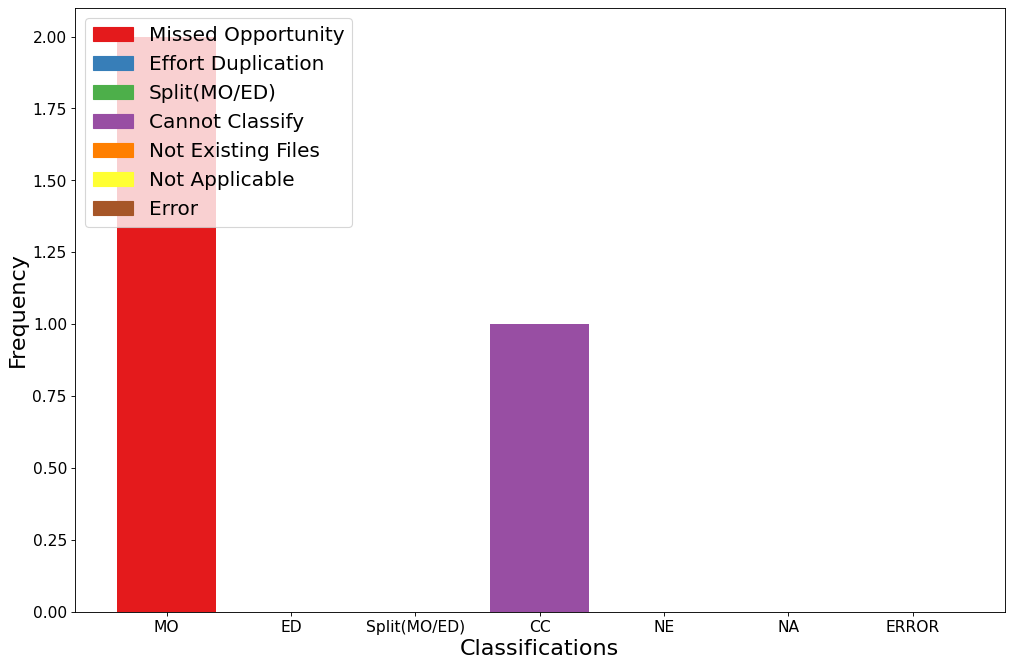

In [11]:
example.runClassification(prs_source)

The results of the classification are stored in 2 dataframes.

Access the patch classifications using dfPatchClass().

You can control the number of rows you wish to see by passing a integer, n,  to the function that will only output the first n rows.

In [12]:
#Patches
example.dfPatchClass()

,Mainline,Fork,Pr nr,Patch classification,Interesting
0,hzdg/django-enumfields,druids/django-choice-enumfields,109,MO,1
2,hzdg/django-enumfields,druids/django-choice-enumfields,102,MO,1
1,hzdg/django-enumfields,druids/django-choice-enumfields,103,CC,0


Access the file classifications using dfFileClass().

You can control the number of rows you wish to see by passing a integer, n,  to the function that will only output the first n rows.

In [13]:
#Files
example.dfFileClass()

,Mainline,Fork,Pr nr,Filename,Operation,File classification,Interesting
0,hzdg/django-enumfields,druids/django-choice-enumfields,109,enumfields/drf/serializers.py,MODIFIED,MO,1
2,hzdg/django-enumfields,druids/django-choice-enumfields,109,tests/test_serializers.py,MODIFIED,MO,1
1,hzdg/django-enumfields,druids/django-choice-enumfields,109,tests/models.py,None,NA,0
3,hzdg/django-enumfields,druids/django-choice-enumfields,103,README.rst,None,OTHER EXT,0
4,hzdg/django-enumfields,druids/django-choice-enumfields,102,setup.py,MODIFIED,MO,1
5,hzdg/django-enumfields,druids/django-choice-enumfields,102,tox.ini,None,OTHER EXT,0
